# ML-8. Ансамблирование. Бэггинг, стекинг, бустинг

Мы будем предсказывать уровень прогрессирования болезни относительно базового уровня (некоторая численная мера, насколько «сильно» болен пациент диабетом). Минимальное значение составляет 25, максимальное — 346. Далее посмотрим на распределение, чтобы убедиться, что это не многоклассовая классификация, данные нормированы и закодированы категориальным кодировщиком. 

Качество будем измерять по среднему квадрату ошибки (MSE) на кросс-валидации с точностью до второго знака после запятой. 

Для чистоты эксперимента возьмём решающее дерево с глубиной 10 (DecisionTreeRegressor) и случайный лес из 10 деревьев (параметр n_estimators) с глубиной 10 (RandomForestRegression).

In [2]:
# Импортируем библиотеки
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

**Загрузка данных**

In [3]:
# Загрузим датасет из библиотеки
data = load_diabetes(as_frame=True)
# Создаем матрицу наблюдений
X = data['frame'].drop('target', axis=1)
# Создаем вектор правильных ответов
y = data['target']
 
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


<AxesSubplot:>

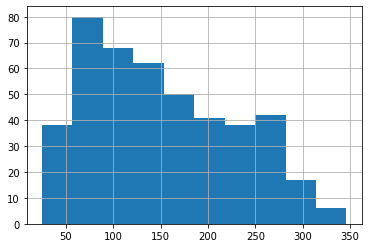

In [4]:
# Посмотрим на распределение целевого признака
y.hist()

In [5]:
# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# Посмотрим на размерности выборок
print(f'Размерность обучающей выборки {X_train.shape}')
print(f'Размерность тестовой выборки {X_test.shape}')

Размерность обучающей выборки (296, 10)
Размерность тестовой выборки (146, 10)


## Бэггинг: случайный лес. 

In [6]:
# Создаем модель дерева решений с максимальной глубиной 10 
regr1 = DecisionTreeRegressor(max_depth=10, random_state=42)
# Обучаем модель
regr1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [7]:
# Создаем модель случайного леса из 10 деревьев с максимальной глубиной 10 для каждого дерева 
regr2 = RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)
# Обучаем модель
regr2.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)

In [8]:
# Формируем предсказания каждой из моделей
y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)
 
# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1),2)}')
print(f'Качество предсказания по MSE для случайного леса  {round(mean_squared_error(y_test, y_pred2),2)}')

Качество предсказания по MSE для решающего дерева 6132.51
Качество предсказания по MSE для случайного леса  3533.73


---

## Задание 2.6
Предлагается используя код из модуля попытаться добиться неообучения для решающего дерева и случайного леса. Для этого:
Используя код из модуля, поставьте глубину деревьев в решающем дереве и случайном лесу, равную 2.
В качестве ответа приведите MSE решающего дерева и случайного леса (по модулю), округлённую до второго знака после запятой.

In [9]:
# Создаем модель дерева решений с максимальной глубиной 2 
regr3 = DecisionTreeRegressor(max_depth=2, random_state=42)
regr3.fit(X_train, y_train) # Обучаем модель

# Создаем модель случайного леса из 10 деревьев с максимальной глубиной 2 
regr4 = RandomForestRegressor(max_depth=2, n_estimators=10, random_state=42)
regr4.fit(X_train, y_train) # Обучаем модель

# Формируем предсказания каждой из моделей
y_pred3 = regr3.predict(X_test)
y_pred4 = regr4.predict(X_test)

# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred3),2)}')
print(f'Качество предсказания по MSE для случайного леса  {round(mean_squared_error(y_test, y_pred4),2)}')

Качество предсказания по MSE для решающего дерева 3432.45
Качество предсказания по MSE для случайного леса  3203.77


## Задание 2.7
 В данном задании предлагается, используя код и прошлого задания, попытаться искусственно добиться переобучения модели решающего дерева и случайного леса.
Используя код из модуля, поставьте глубину деревьев в решающем дереве и случайном лесу, равную 1000.
В качестве ответа приведите MSE решающего дерева и случайного леса (по модулю), округлённую до второго знака после запятой.

In [11]:
# Создаем модель дерева решений с максимальной глубиной 1000 
regr5 = DecisionTreeRegressor(max_depth=1000, random_state=42)
regr5.fit(X_train, y_train) # Обучаем модель

# Создаем модель случайного леса из 10 деревьев с максимальной глубиной 1000 
regr6 = RandomForestRegressor(max_depth=1000, n_estimators=10, random_state=42)
regr6.fit(X_train, y_train) # Обучаем модель

# Формируем предсказания каждой из моделей
y_pred5 = regr5.predict(X_test)
y_pred6 = regr6.predict(X_test)

# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred5),2)}')
print(f'Качество предсказания по MSE для случайного леса  {round(mean_squared_error(y_test, y_pred6),2)}')

Качество предсказания по MSE для решающего дерева 6430.63
Качество предсказания по MSE для случайного леса  3549.09
